In [2]:
%pip install adversarial-robustness-toolbox

     |████████████████████████████████| 890kB 9.1MB/s 
     |████████████████████████████████| 21.0MB 5.2MB/s 
     |████████████████████████████████| 235kB 55.3MB/s 
     |████████████████████████████████| 6.8MB 21.1MB/s 
     |████████████████████████████████| 747kB 37.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np

from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
from art.utils import load_mnist
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Step 1: Load the MNIST dataset

(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

# Step 2: Create the model

model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5, 5), strides=1, activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=1, activation="relu", input_shape=(23, 23, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu', name='fc1'))
model.add(Dense(84, activation='relu', name='fc2'))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))


In [15]:
model.compile(
    loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=0.01), metrics=["accuracy"]
)

# Step 3: Create the ART classifier

classifier = KerasClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value), use_logits=False)

# Step 4: Train the ART classifier

classifier.fit(x_train, y_train, batch_size=256, nb_epochs=10)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/10
234/234 [==============================] - 21s 89ms/step - batch: 116.5000 - size: 256.0000 - loss: 0.2518 - accuracy: 0.9193
Epoch 2/10
234/234 [==============================] - 21s 89ms/step - batch: 116.5000 - size: 256.0000 - loss: 0.0827 - accuracy: 0.9751
Epoch 3/10
234/234 [==============================] - 21s 89ms/step - batch: 116.5000 - size: 256.0000 - loss: 0.0606 - accuracy: 0.9818
Epoch 4/10
234/234 [==============================] - 21s 89ms/step - batch: 116.5000 - size: 256.0000 - loss: 0.0465 - accuracy: 0.9861
Epoch 5/10
234/234 [==============================] - 21s 89ms/step - batch: 116.5000 - size: 256.0000 - loss: 0.0454 - accuracy: 0.9865
Epoch 6/10
234/234 [==============================] - 21s 89ms/step - batch: 116.5000 - size: 256.0000 - loss: 0.0412 - accuracy: 0.9883
Epoch 7/10
234/234 [==============================] - 21s 89ms/step - batch: 116.5000 - size: 256.0000 - loss: 0.0398 - accuracy: 0.9885
Epoch 8/10
234/234 [=====================

In [17]:
predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples
attack = FastGradientMethod(estimator=classifier, eps=0.2)
x_test_adv = attack.generate(x=x_test)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 98.69%
Accuracy on adversarial test examples: 53.04%


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_test_adv.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)
(10000, 28, 28, 1)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(x_test_adv.reshape(-1))
# save to csv file
savetxt('/content/drive/My Drive/data_3_e_high.csv', data, delimiter=',')

In [ ]:
drive.flush_and_unmount()

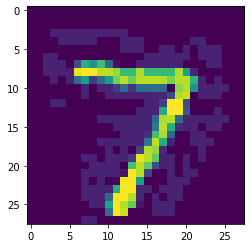

In [ ]:
from matplotlib import pyplot as plt
from numpy import loadtxt

data = loadtxt('/content/drive/My Drive/data_3.csv', delimiter=',')
data = data.reshape((10000, 28, 28, 1))
plt.imshow(data[0].reshape(28,28), interpolation='nearest')
plt.show()
